In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# Loading the raw discounts data

In [3]:
discounts_df = pd.read_csv('non_rand_discount.csv',sep=';')

In [4]:
discounts_df.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [5]:
discounts_df.shape

(15000, 45)

In [6]:
def sniff(df):
  """
  Function identifies the datatype and also calculates the percentage of missing values of all columns of input dataframe 

  Parameter and type: 
    df(Pandas Dataframe): Dataframe

  Return:
    :rtype: Dataframe 
    :return: Dataframe with column names, their datatypes and percentage of missing values, sorted by data types 

  """
  with pd.option_context("display.max_colwidth", 20):
    info = pd.DataFrame()
    info['sample'] = df.iloc[0]
    info['data type'] = df.dtypes
    info['percent missing'] = df.isnull().sum()*100/len(df)
    return info.sort_values('data type')

In [7]:
sniff(discounts_df)

,sample,data type,percent missing
spend_1m_baby,0,int64,0.000000
tenure,6,int64,0.000000
age,40,int64,0.000000
spend_3m_eletronic,0,int64,0.000000
spend_2m_eletronic,0,int64,0.000000
spend_1m_eletronic,0,int64,0.000000
spend_2m_groceries,15,int64,0.000000
spend_1m_groceries,45,int64,0.000000
spend_6m_pet,0,int64,0.000000
sales_prediction_bins,8,int64,0.000000


In [8]:
#cleaning the discount column and converting it to numeric
discounts_df['discount'] = discounts_df['discount'].str.split(" ").str[1].astype('float64')

In [9]:
sniff(discounts_df)

,sample,data type,percent missing
spend_1m_baby,0,int64,0.000000
tenure,6,int64,0.000000
age,40,int64,0.000000
spend_3m_eletronic,0,int64,0.000000
spend_2m_eletronic,0,int64,0.000000
spend_1m_eletronic,0,int64,0.000000
spend_2m_groceries,15,int64,0.000000
spend_1m_groceries,45,int64,0.000000
spend_6m_pet,0,int64,0.000000
sales_prediction_bins,8,int64,0.000000


 - There are missing value in the `gender` column which could be from customers who have not reported their gender.
 - All other columns have the right data type
 - The treatment variable is `discount`, the outcome primarily `profit`, but we can argue `sales` is also an outcome variable. All the other variables are covariates. 


## Understanding the treatment assignment mechanism


The profit equation of this company is:
 
$
Profit_i = Sales_i * 5\% - Discount_i
$
 
Now, let's see how discount is correlated with both of these variables. We won't make any causal statements for now.

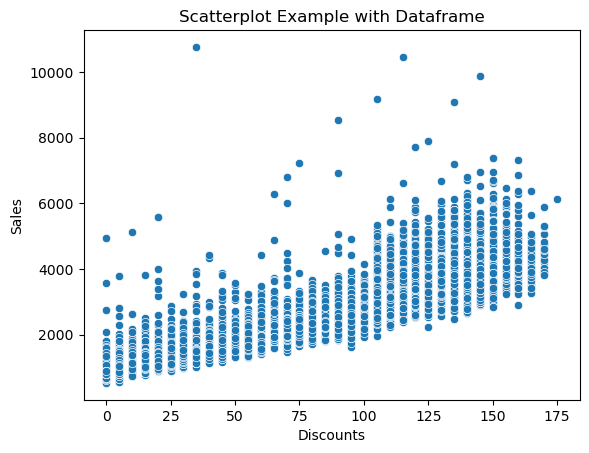

In [10]:
# Create scatterplot with dataframe
sns.scatterplot(data=discounts_df, x='discount', y='sales')

# Add labels and title
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.title('Scatterplot Example with Dataframe')

# Show plot
plt.show()

<Axes: xlabel='discount', ylabel='sales'>

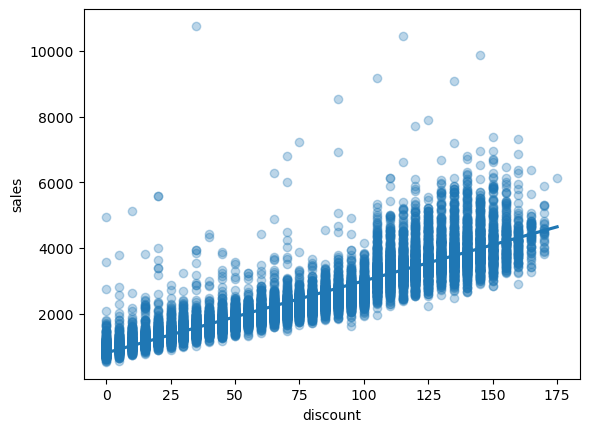

In [11]:
sns.regplot(data = discounts_df, x="discount", y="sales", scatter_kws={"alpha":0.3})

<Axes: xlabel='discount', ylabel='profit'>

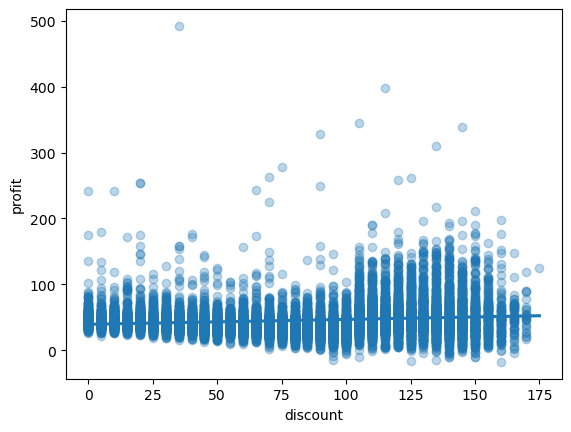

In [12]:
sns.regplot(data = discounts_df, x="discount", y="profit", scatter_kws={"alpha":0.3})

There seems to be a positive correlation between discount and dales and between discount and profit. 
But we can't make any causal statement yet. For that, we need to check if customers with low discount levels are comparable to those with high discount levels. 
If that's not the case, it could be that the correlation is spurious. For instance, it could be that those that get more discounts already spend more in the first place, 
even if they didn't get the discount. 

Let's look for any fundamental difference between those customers that have high discount and those that have low discount. Ideally, they should be comparable, as if in a randomized trial. In other words, customers that receive low discount should be similar to those that received high discount, except for their discount level. 

<Axes: xlabel='tenure', ylabel='discount'>

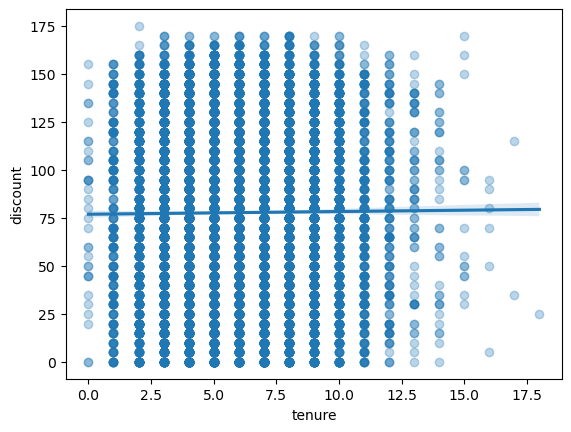

In [13]:
sns.regplot(data = discounts_df, x="tenure", y="discount", scatter_kws={"alpha":0.3})

<Axes: xlabel='age', ylabel='discount'>

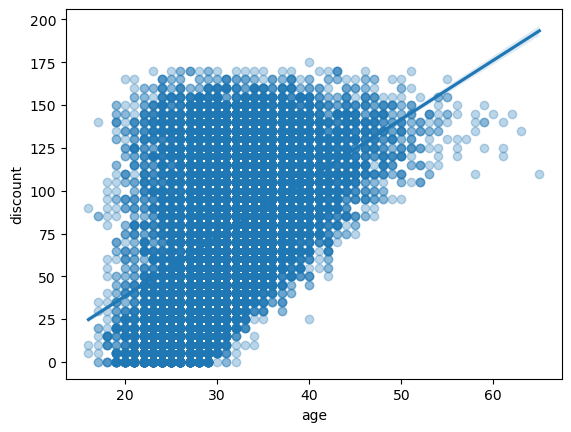

In [14]:
sns.regplot(data = discounts_df, x="age", y="discount", scatter_kws={"alpha":0.3})

<Axes: xlabel='sales_prediction', ylabel='discount'>

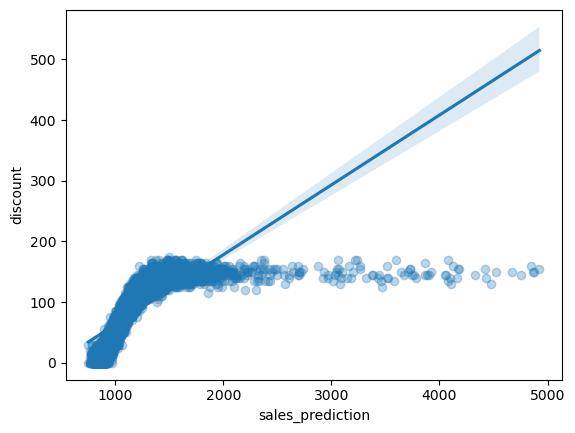

In [15]:
sns.regplot(data = discounts_df, x="sales_prediction", y="discount", scatter_kws={"alpha":0.3})

<Axes: xlabel='cust_state', ylabel='discount'>

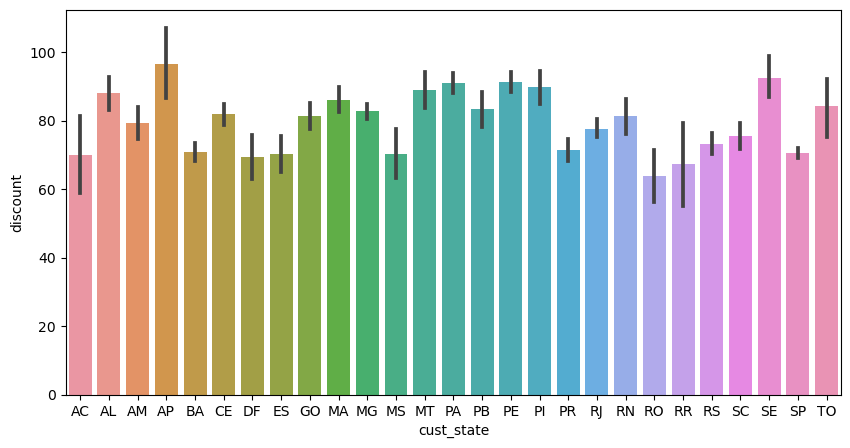

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data = discounts_df.sort_values("cust_state"), x="cust_state", y="discount")

<Axes: xlabel='discount', ylabel='profit'>

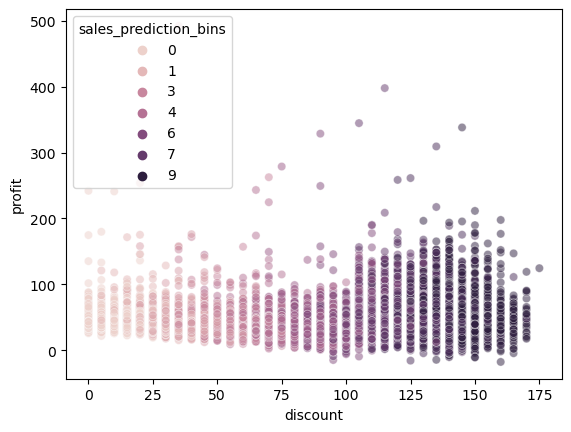

In [17]:
sns.scatterplot(data = discounts_df, x="discount", y="profit", hue="sales_prediction_bins", alpha=0.5)

As we can see, the higher the age, the higher the discount level. Also, the higher the `sales_prediction`, the higher the discount level. This indicates that the company was giving more discounts to those that it predicted to spend more. That's problematic for our causal statements. It means that those with a high discount would have bought more even without the discount. In potential outcome terms
 
$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$
 
that is, those with high discount levels, had they received a low discount level (potential outcome 0) would still generate more profit that those that received a low discount level.

# Understanding the confounding bias

In [61]:
model = smf.ols("sales~discount", data=discounts_df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,804.5246,7.790,103.274,0.000,789.255,819.794
discount,21.9248,0.087,251.815,0.000,21.754,22.095


In [63]:
model = smf.ols("profit~discount", data=discounts_df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.4217,0.382,103.274,0.000,38.673,40.170
discount,0.0743,0.004,17.419,0.000,0.066,0.083


Nothing new here. Once again, we conclude that discount is positively correlated with sales, with a confidence very far away from zero (21.754, 22.095), meaning this relationship is statistically significant. We expect each unit increase in discount to be associated with a 21.9 sales increase, on average. As for discount, again, the relationship is statistically significant, but much smaller. We expect each unit increase in discount to be associated with a 0.07 increase in profit, on average.

In [65]:
model = smf.ols("discount~sales_prediction+age", data=discounts_df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-102.3049,1.299,-78.761,0.000,-104.851,-99.759
sales_prediction,0.1011,0.001,119.864,0.000,0.099,0.103
age,2.1037,0.038,55.864,0.000,2.030,2.178


As for how the other variables affect discounts, it looks like both `sales_prediction` and `age` are associated with an increase in discount. For instance, if we increase age in one unit **while holding sales_prediction constant**, we expect discounts to increase in 2.1 units, on average.

In [23]:
import graphviz as gr

Confounders are variables that cause both the treatment and the outcome. We can't check for the existence of confounders just by looking at the data, but we can leverage our intuition about how the world works. For instance, if we know from previous steps that the higher the age, the higher the discount. We also know that older customers tend to have more money than younger ones. Hence, the higher the age, the higher the income and, probably, the higher the sales and profit. Age is thus a possible confounder because it causes discounts to go up and sales to go up. Another potential confounder is sales predictions. So, the higher the sales prediction, the higher the discount and also the higher de sales and profit. Hence, sales prediction is probably a confounder. 
 
If we were to plot the causal graph with age, sales prediction, discount and profit, we would probably have something like this:

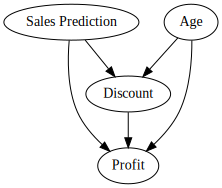

In [24]:
g = gr.Digraph()

g.edge("Sales Prediction", "Discount")
g.edge("Age", "Discount")
g.edge("Age", "Profit")
g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g

## Regression Adjustment

In [31]:
model = smf.ols("profit~discount + C(sales_prediction_bins) + age", data=discounts_df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.0247,0.972,6.200,0.000,4.120,7.929
C(sales_prediction_bins)[T.1],-3.3510,0.798,-4.200,0.000,-4.915,-1.787
C(sales_prediction_bins)[T.2],-7.7562,0.901,-8.604,0.000,-9.523,-5.989
C(sales_prediction_bins)[T.3],-12.1335,1.035,-11.724,0.000,-14.162,-10.105
C(sales_prediction_bins)[T.4],-15.4909,1.217,-12.725,0.000,-17.877,-13.105
C(sales_prediction_bins)[T.5],-17.2340,1.395,-12.355,0.000,-19.968,-14.500
C(sales_prediction_bins)[T.6],-11.4120,1.615,-7.066,0.000,-14.578,-8.246
C(sales_prediction_bins)[T.7],-3.1408,1.798,-1.747,0.081,-6.666,0.384
C(sales_prediction_bins)[T.8],-1.1977,2.043,-0.586,0.558,-5.202,2.807
C(sales_prediction_bins)[T.9],0.3677,2.229,0.165,0.869,-4.001,4.737


Regressing the profit vs. discounts while also taking into confounders like sales_prediction_bins & age, We can see that the coefficient is now negative. We can interpret it like this: while holding sales prediction & age constant, increasing discount in 1 unit should **decrease** profit by 0.0532. We can interpret this as a causal parameter because we know that `sales_prediction_bins` & `age` are the only variable used to determine the discount customer's received. That is, `sales_prediction_bins` & `age` is the only confounder and we've adjusted for it. 

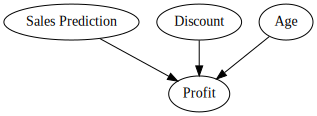

In [32]:
g = gr.Digraph()


g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")
g.edge("Age","Profit")

g

Based on what we've found, it looks like disocunt is reducing profits. AT first, it looked like discounts and profits were positivly linked. But that was only do to confounding bias. Once we controled for sales prediction we've essentially removed the arrow in our graph that goes from sales prediction to discount

- **Recommendation**: The relationship between discount and profits becomes negative, meaning that discount causes it to go down. Hence, we recommend the e-commerce company to stop giving discounts or to at least think about a better discount strategy that isn't sacrificing profits. 